# HW03 (due October 17th 23:59)

The goal of this homework is to **predict** the value of houses in California starting from house and neighborhood caracteristics. 

Differently from last week's homework, we are not interested in investigating the causal effect of some features on house values, but the main purpose is to obtain good predictions of the values, so to train the best model to minimize the loss function. 

In [2]:
# Load Data
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

20640 8


# Summary Statistics

Text(0.5, 9.444444444444438, 'Price in hundreds of thousand dollars')

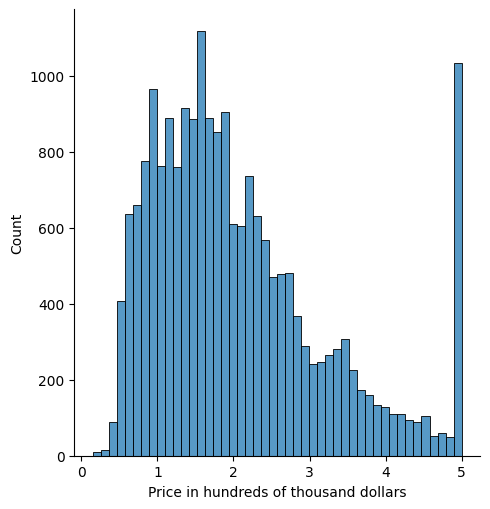

In [4]:
from seaborn import displot
import matplotlib.pyplot as plt

# make a histogram of the label variable
displot(data['target'], kde=False)
plt.xlabel("Price in hundreds of thousand dollars")

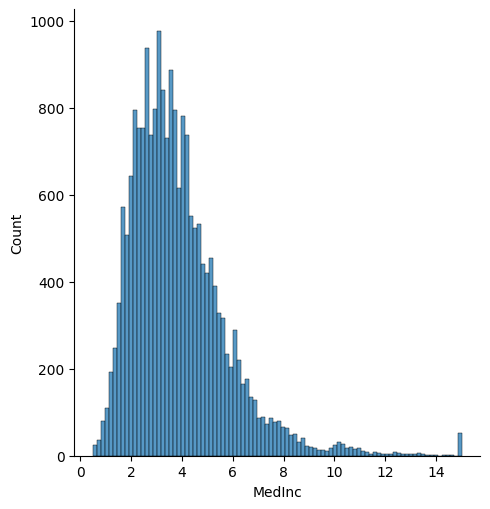

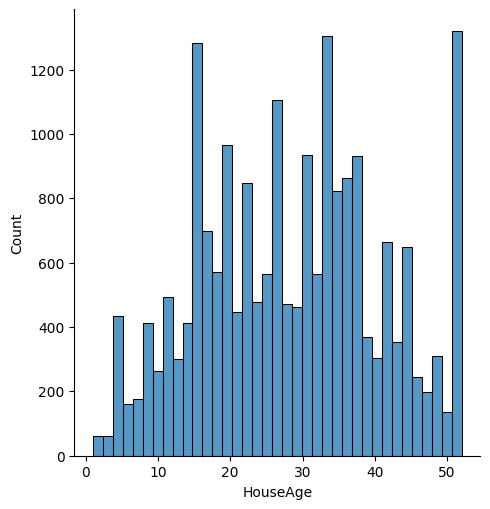

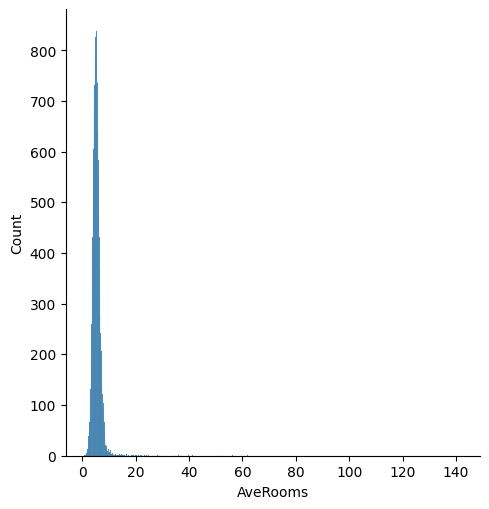

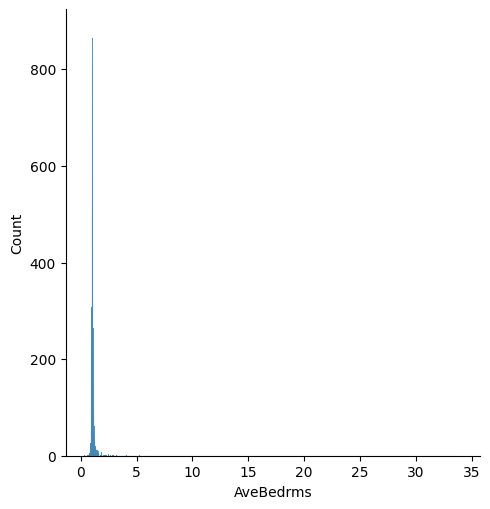

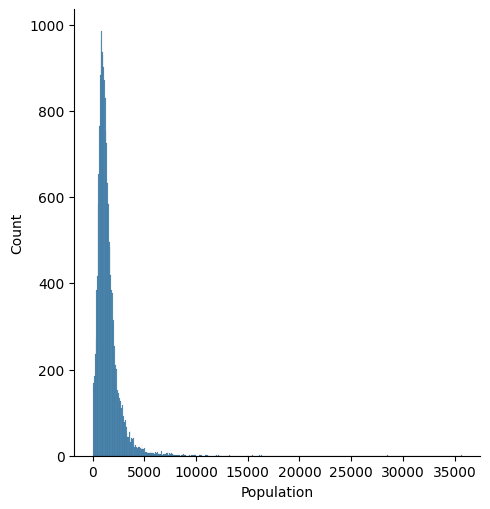

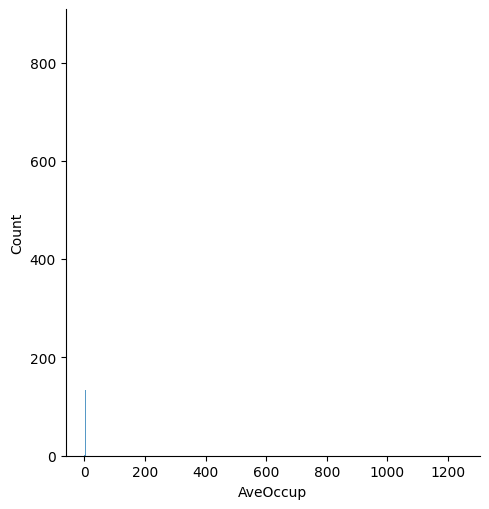

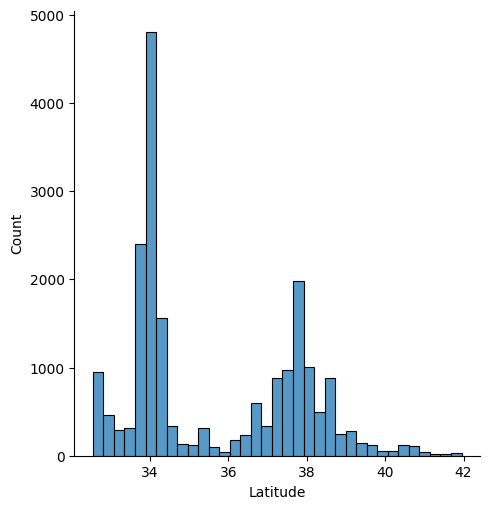

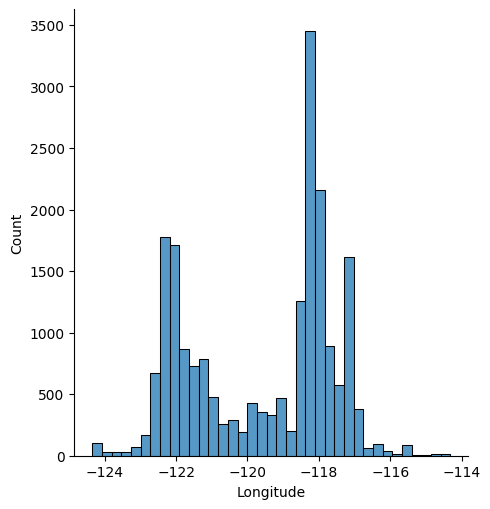

In [5]:
# make histograms of all predictors
for index, predictor in enumerate(data["feature_names"]):
    displot(data["data"][:, index], kde=False)
    plt.xlabel(predictor)

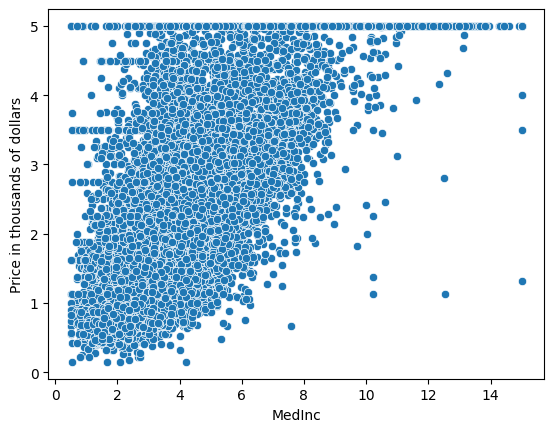

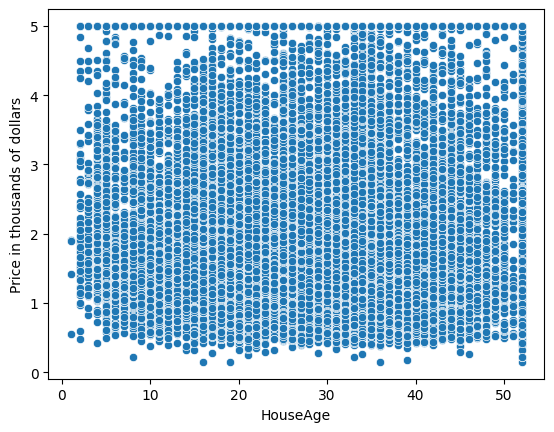

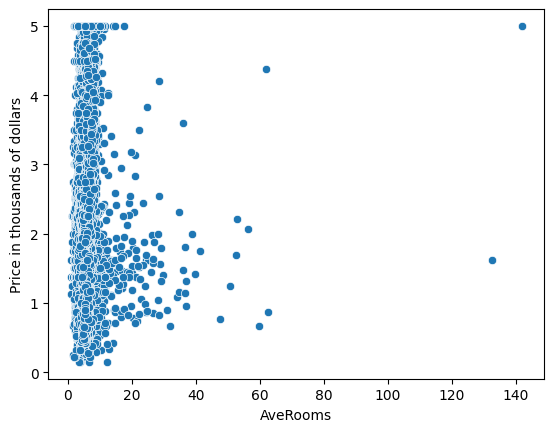

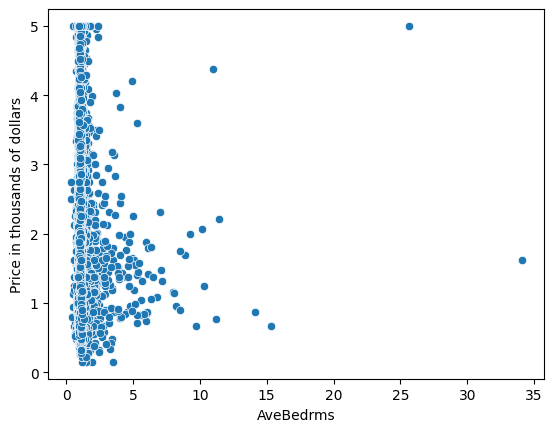

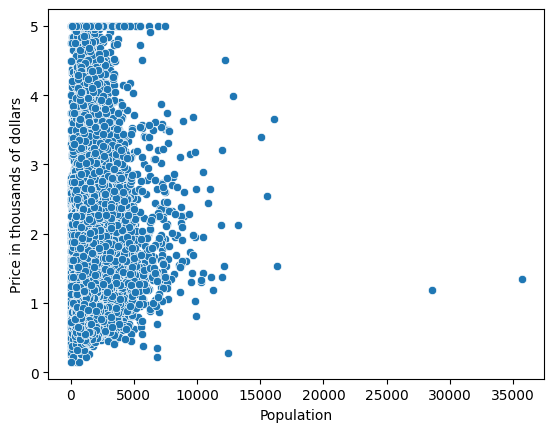

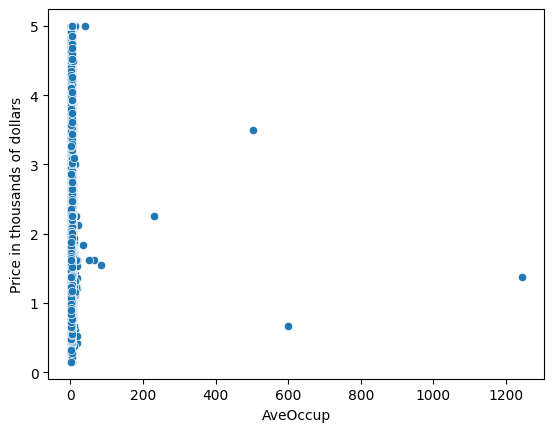

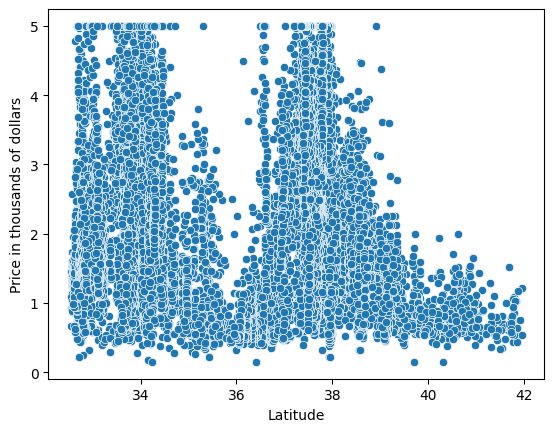

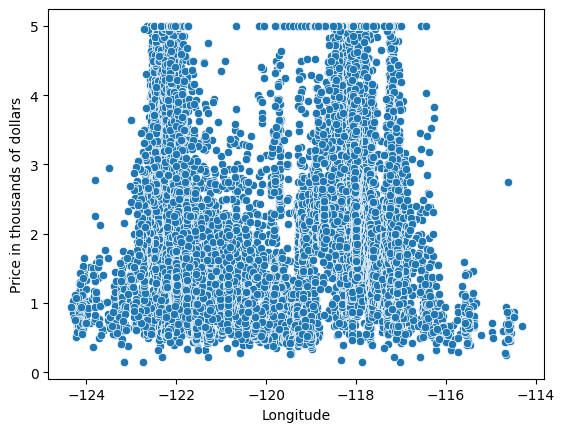

In [6]:
from seaborn import scatterplot
# make scatterplots of all predictors with the label
for index, predictor in enumerate(data["feature_names"]):
    scatterplot(x=data["data"][:, index], y=data["target"])
    plt.xlabel(predictor)
    plt.ylabel('Price in thousands of dollars')
    plt.show()

# Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(data["data"], data["target"], test_size=0.2, random_state=42)

# Pre-Processing

In [8]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data
scaler = StandardScaler().fit(X_train)

X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data
polynomial_generator = PolynomialFeatures(degree=2).fit(X_train_standardized)

X_train_polynomial = polynomial_generator.transform(X_train_standardized)
X_test_polynomial = polynomial_generator.transform(X_test_standardized)

## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [10]:
#!conda install fracridge

In [11]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# train fractional ridge on raw predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
frcv = FracRidgeRegressorCV()

frcv.fit(X_train, y_train)

# Report the chosen fraction penalty
print(f'Chosen fraction penalty: {frcv.alpha_}')

# Make predictions on the test set
y_pred = frcv.predict(X_test)

# Report MSE and r-squared in test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Chosen fraction penalty: [[0.]]
Mean Squared Error: 0.6294468701967413
R-squared: 0.5196561679226936


In [13]:
# train fractional ridge on stanardized predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
frcv = FracRidgeRegressorCV()

frcv.fit(X_train_standardized, y_train)

# Report the chosen fraction penalty
print(f'Chosen fraction penalty: {frcv.alpha_}')

# Make predictions on the test set
y_pred = frcv.predict(X_test_standardized)

# Report MSE and r-squared in test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Chosen fraction penalty: [[0.]]
Mean Squared Error: 4.863273551279817
R-squared: -2.711263912285081


In [17]:
# train fractional ridge on standardized predictors including quadratics and interactions
# report the chosen fraction penalty
# report MSE and r-squared in test set 
frcv = FracRidgeRegressorCV()

frcv.fit(X_train_polynomial, y_train)

# Report the chosen fraction penalty
print(f'Chosen fraction penalty: {frcv.alpha_}')

# Make predictions on the test set
y_pred = frcv.predict(X_test_polynomial)

# Report MSE and r-squared in test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Chosen fraction penalty: [[552.54689937]]
Mean Squared Error: 0.5536385613865128
R-squared: 0.5775070450679296


In [18]:
from seaborn import regplot

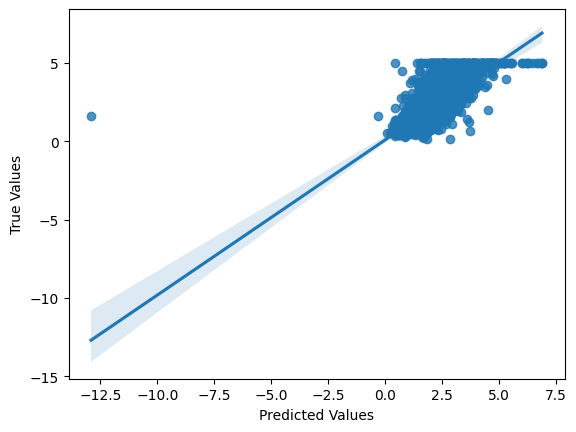

In [20]:
# report a binned regplot of the true outcome versus predictions in the test set
regplot(x=y_pred, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**How do the results change when using different predictors? Which one do you think is the best model for this task? Explain.**

In [80]:
# Test different predictors
first_index = 0
last_index = 8

polynomial_generator = PolynomialFeatures(degree=2).fit(X_train_standardized[:, first_index:last_index])

X_train_polynomial = polynomial_generator.transform(X_train_standardized[:, first_index:last_index])
X_test_polynomial = polynomial_generator.transform(X_test_standardized[:, first_index:last_index])

frcv = FracRidgeRegressorCV()

frcv.fit(X_train_polynomial, y_train)

# Report the chosen fraction penalty
print(f'Chosen fraction penalty: {frcv.alpha_}')

# Make predictions on the test set
y_pred = frcv.predict(X_test_polynomial)

# Report MSE and r-squared in test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Chosen fraction penalty: [[552.54689937]]
Mean Squared Error: 0.5536385613865128
R-squared: 0.5775070450679296


In [76]:
frcv = FracRidgeRegressorCV()

frcv.fit(X_train[:, 0:1], y_train)

# Report the chosen fraction penalty
print(f'Chosen fraction penalty: {frcv.alpha_}')

# Make predictions on the test set
y_pred = frcv.predict(X_test[:, 0:1])

# Report MSE and r-squared in test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Chosen fraction penalty: [[0.]]
Mean Squared Error: 0.7529550957035984
R-squared: 0.42540450484827297


**Answer:**

To check what happens using different predicators, I first tried using different combination for the polynomial since it yielded the best outcome. However, using all features was the best results. After checking the scatterplots, I noticed a strong correlation between MedInc and the House price. Thus, using this feature alone returned the second best result which is expected.
After trying multiple combination, the polynomial features expansion using all features was the best with the smallest MSE. 